# logistic regression

In [153]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [154]:
class Logistic_regression:
     
    def init(self, x):
        w = np.random.random(size=(x.shape[1]+1,1))
        x = np.concatenate((np.ones([x.shape[0],1]),x),axis=1)
        return (w,x)
   
    def sigmoid(self,z):
        sig = 1 / ( 1+ np.exp(-z))
        return sig 
             
    def fit(self,x,y, lr=0.01, iter=400):
        w,x=self.init(x)
        y=np.reshape(y.to_numpy(), (-1, 1))
        losses=[]
        def cost(h):
            z=x@h
            y_pred=self.sigmoid(z)
            loss1=y.T @ (np.log(y_pred))
            loss2=(1-y).T @ (np.log(1-y_pred))
            loss=-(loss1+loss2)/len(y)
            return loss
        for i in range(iter):
            w -= lr*x.T@(self.sigmoid(x@w)-y)
            losses.append(cost(w))
        self.w=w
        return losses    
   
    def predict(self,m):
        z=self.init(m)[1]@self.w
        y=[]
        for i in self.sigmoid(z):
            if i>=0.5:
                y.append(1)
            else:
                y.append(0)
        y = np.asarray(y)
        return y
 
    def acc(self,y_pred, y_test):
        y_test=y_test.reset_index(drop=True)
        true=0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                true += 1
        return true/len(y_pred)
    
#     def plot():
#         my_iter=[i for i in range(iter)]
#         sns.scatterplot(x=my_iter, y=losses)

In [155]:
data=pd.read_csv(r"C:\Users\Anna\Downloads\framingham.csv")

In [156]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [157]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [158]:
data = data.dropna()
data = data.reset_index(drop=True)

In [159]:
y=data.diabetes

In [160]:
data.drop('diabetes', inplace=True, axis=1)

In [161]:
np.isnan(data).sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [162]:
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.25,random_state=0)

In [163]:
regr=Logistic_regression()
regr.fit(X_train,y_train)
y_pred=regr.predict(X_test)
print(regr.acc(y_pred,y_test))

<ipython-input-154-eb70152c2f15>:9: RuntimeWarning: overflow encountered in exp
  sig = 1 / ( 1+ np.exp(-z))
<ipython-input-154-eb70152c2f15>:19: RuntimeWarning: divide by zero encountered in log
  loss1=y.T @ (np.log(y_pred))
<ipython-input-154-eb70152c2f15>:19: RuntimeWarning: invalid value encountered in matmul
  loss1=y.T @ (np.log(y_pred))
<ipython-input-154-eb70152c2f15>:20: RuntimeWarning: divide by zero encountered in log
  loss2=(1-y).T @ (np.log(1-y_pred))
<ipython-input-154-eb70152c2f15>:20: RuntimeWarning: invalid value encountered in matmul
  loss2=(1-y).T @ (np.log(1-y_pred))


0.9781181619256017


# sklearn logistic regression

In [167]:
model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.986870897155361


C:\Users\Anna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# visualisation

<AxesSubplot:>

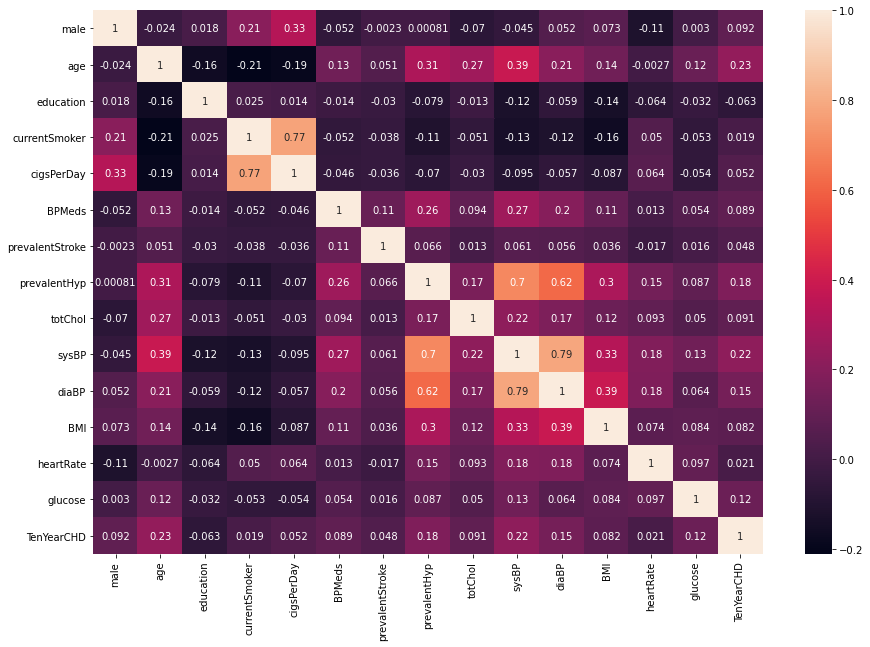

In [165]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

<ipython-input-154-eb70152c2f15>:9: RuntimeWarning: overflow encountered in exp
  sig = 1 / ( 1+ np.exp(-z))


Train accuracy: 0.97
Test accuracy: 0.98


Text(33.0, 0.5, 'True')

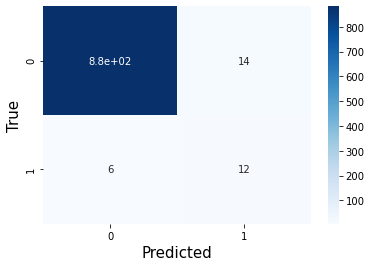

In [166]:
print("Train accuracy:", np.round(accuracy_score(y_train, regr.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 2))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('True', fontsize=15)